### Importando a base de dados 

In [2]:
import pandas as pd

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

display(funcionarios_df.head())
display(clientes_df.head())
display(servicos_df.head())

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


### 1. Valor total da folha salarial

In [6]:
folha = funcionarios_df['Salario Base']+funcionarios_df['Impostos']+funcionarios_df['Beneficios']+funcionarios_df['VT']+funcionarios_df['VR']
print(f'A folha salarial total da empresa foi R$ {sum(folha):,}')

A folha salarial total da empresa foi R$ 2,717,493.22


### 2. Qual foi o faturamento total da empresa

In [13]:
#faturamento_df = servicos_df.merge(clientes_df, on='ID cliente') Dessa forma junta-se as 2 planilhas inteiras
faturamento_df = servicos_df[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente','Valor Contrato Mensal']], on='ID Cliente')    
faturamento_total = faturamento_df['Tempo Total de Contrato (Meses)'] * faturamento_df['Valor Contrato Mensal']
print(f'O faturamento total da empresa foi de R$ {sum(faturamento_total):,.2f}')

O faturamento total da empresa foi de R$ 5,519,160.00


### 3. Qual o % de funcionários fechou algum contrato

In [19]:
total_funcionarios = len(funcionarios_df['ID Funcionário'])
total_func_contr = len(servicos_df['ID Funcionário'].unique())
print(f'{(total_func_contr / total_funcionarios):.2%}')

86.84%


### 4. Qual o total de contratos fechados por área

Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


<AxesSubplot:>

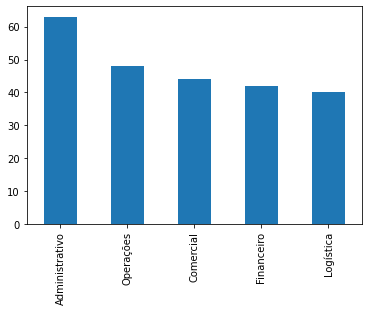

In [30]:
contratos_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']],on='ID Funcionário')
total_contratos = contratos_df['Area'].value_counts()
print(total_contratos)
total_contratos.plot(kind='bar')

### 5. Qual o total de funcionários por área

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


<AxesSubplot:ylabel='Area'>

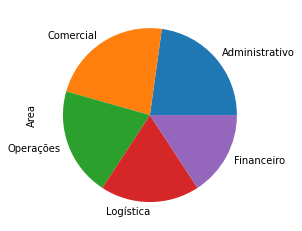

In [33]:
total_func_area = funcionarios_df['Area'].value_counts()
print(total_func_area)
total_func_area.plot(kind='pie')

### 6. Qual o ticket médio mensal

In [39]:
ticket = clientes_df['Valor Contrato Mensal'].mean()
print(f'O Ticket médio da empresa foi de R$ {(ticket):,.2f}')

O Ticket médio da empresa foi de R$ 2,502.56
